# Fractional Brownian Motion Parameter Estimation Using Periodogram Method

The periodigram method uses the fractional brownian noise power spectrum to estimate the Hurst,</br>
denoted by $H$. The power spectrum is the Fourier transform of the fractional brownian motion noise autocorrelation</br>
function. This relationship is called the Weiner-Khichnin theorem.</br>

Let $Z^H(t)$ denote a fractional path then fractional brownian noise is defined by,

$
\begin{align}
\Delta Z_k^H = Z^H(t_k) - Z^H(t_{k-1})
\end{align}
$

where $t_k = k \Delta t$. It follows that,

$
\begin{align}
Z^H(n\Delta t) = \sum_{i=1}^n \Delta Z_k^H
\end{align}
$

The autocovariance of fractional brownian noise is given by,

$
\begin{align}
\gamma^H_n = \text{Cov}[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Since $\text{Var}(\Delta Z_k^H) = \Delta t^{2H}$ the autocorrelation coefficient is defined by,</br>

$
\begin{align}
\rho^H_n = \frac{\gamma^H_n}{\Delta t^{2H}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

From the Weiner-Khichnin theorem the power spectrum is given by,</br>

$
\begin{align}
\hat{\rho}^H_\omega = \frac{1}{2} \int_{-\infty}^{\infty} \rho^H_n e^{-i \omega n} dn
\end{align}
$

It can be shown that fir $\omega \ggg 1$,

$
\begin{align}
\hat{\rho}^H_\omega \approx C\lvert \omega \rvert^{1 - 2H}
\end{align}
$

where $C$ is independent of $\omega$. It follows that $H$ can be determined by using OLS on $\hat{\rho}^H_\omega$ as a</br>
function of $\omega$.

## Imports

In [13]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plots import (PlotDataType, RegressionPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [7]:
Δt = 1.0
npts = 2**10
time = numpy.linspace(0.0, float(npts)*Δt, npts)
ω = numpy.linspace(1.0, npts, npts-1)

## Power Spectrum Simulation H=0.8

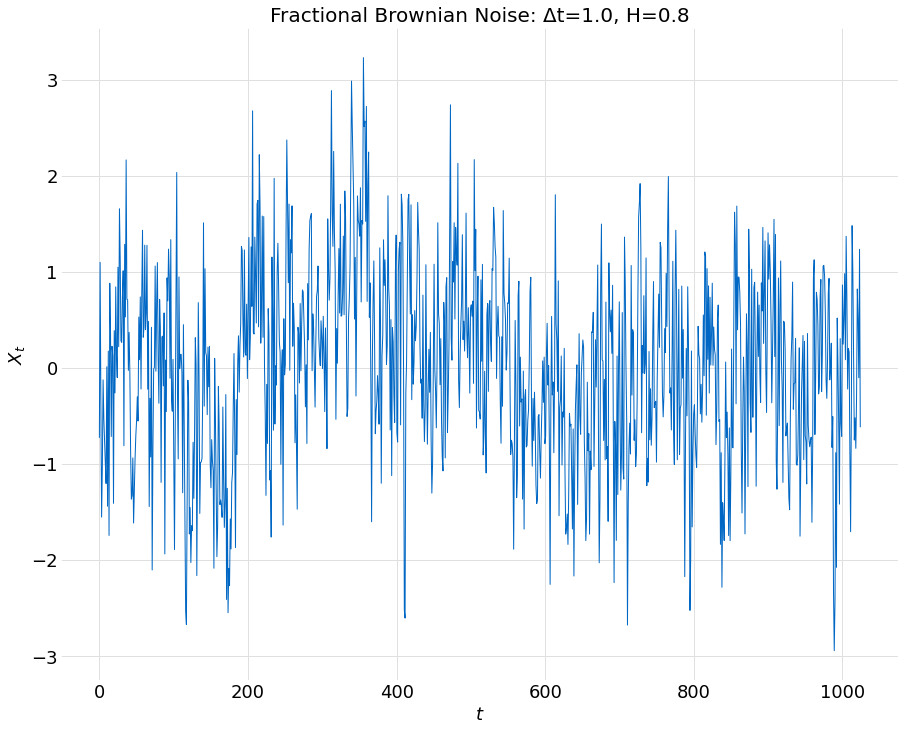

In [8]:
H = 0.8
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.curve(time, samples[:npts], title)

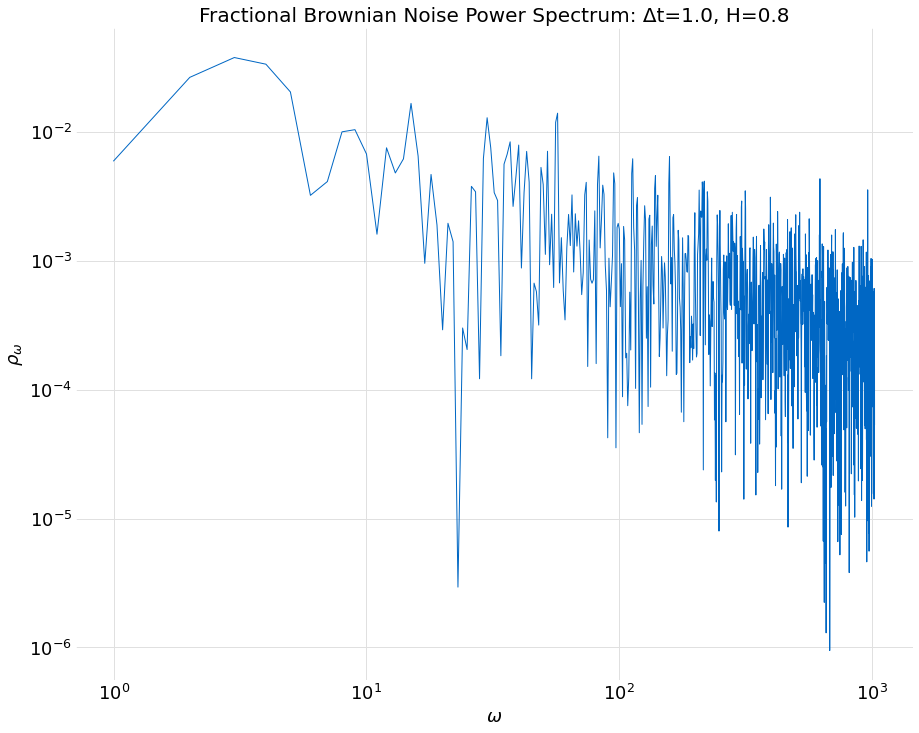

In [11]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.curve(ω, ps, title, data_type=PlotDataType.PSPEC)

In [14]:
results = stats.OLS(ps, ω, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     282.4
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           3.81e-56
Time:                        13:52:12   Log-Likelihood:                -842.97
No. Observations:                1023   AIC:                             1690.
Df Residuals:                    1021   BIC:                             1700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6680      0.105    -15.822      0.000      -1.875      -1.461
x1            -0.6780      0.040    -16.806      0.000      -0.757      -0.599
==============================================================================
Omnibus:                      172.954   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.372
Skew:                          -1.056   Prob(JB):                     1.62e-65
Kurtosis:                       4.593   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

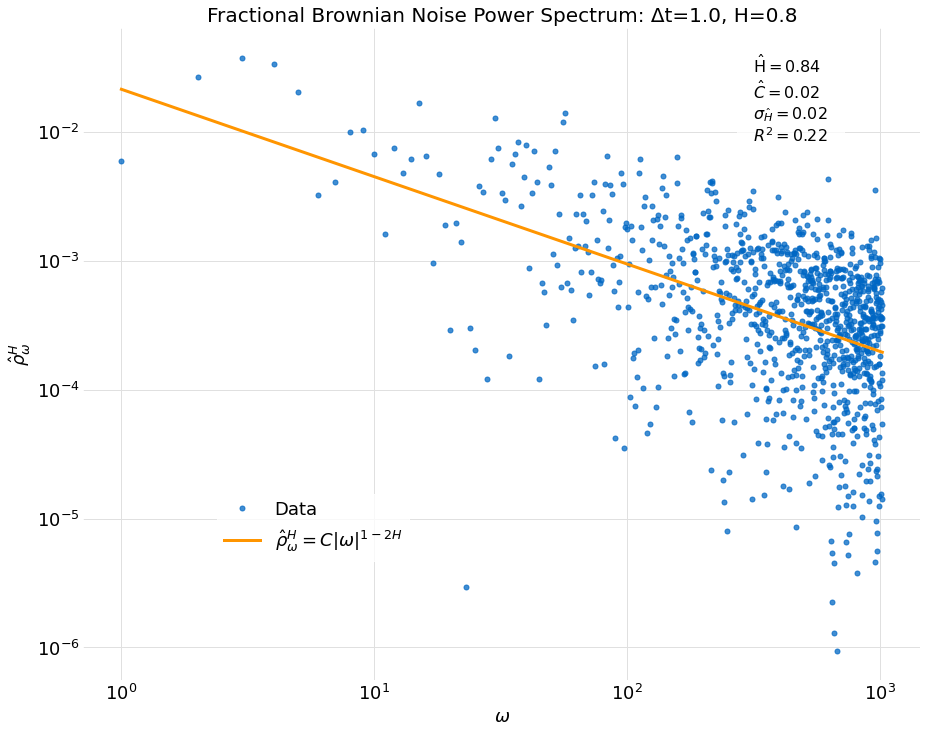

In [15]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.regression(ps, ω, results, title, RegressionPlotType.FBM_PSPEC)

## Power Spectrum Simulation H=0.3

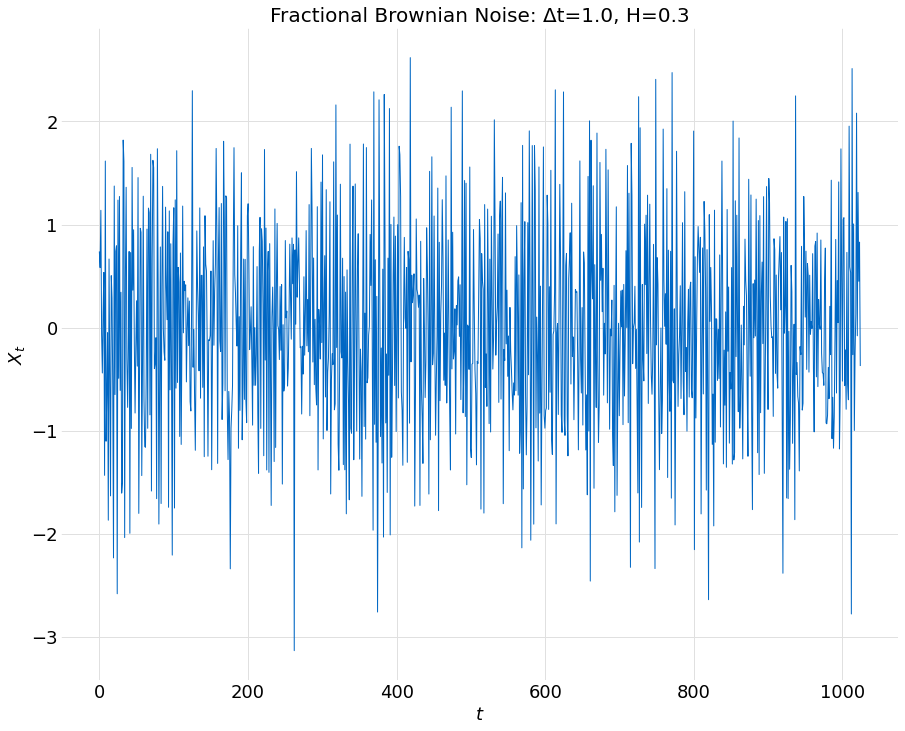

In [16]:
H = 0.3
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.curve(time, samples[:npts], title)

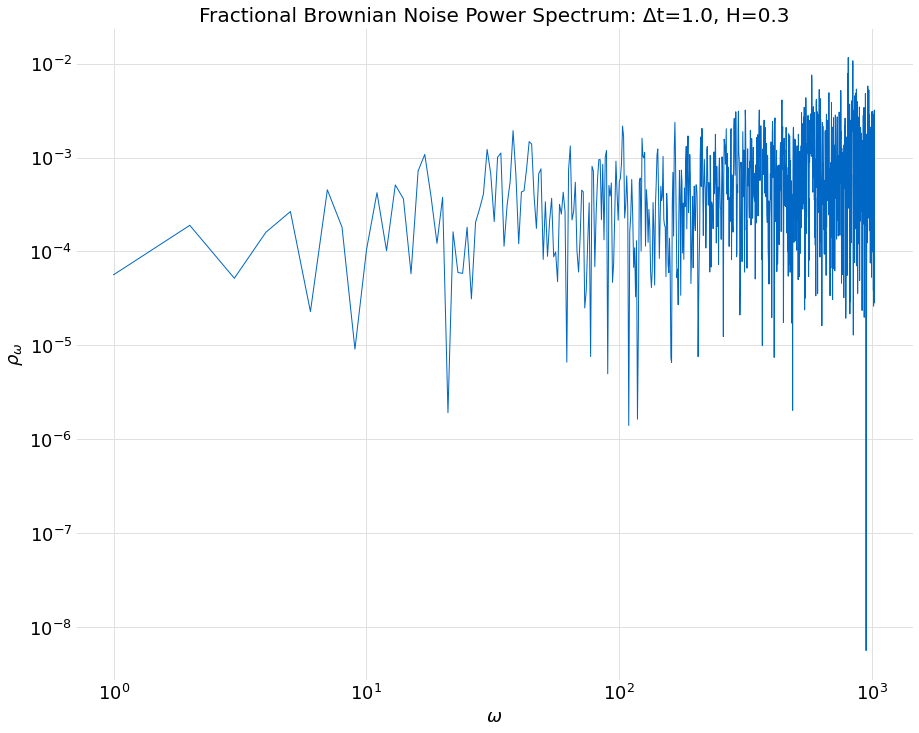

In [17]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.curve(ω, ps, title, data_type=PlotDataType.PSPEC)

In [18]:
results = stats.OLS(ps, ω, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     98.14
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           3.74e-22
Time:                        13:53:24   Log-Likelihood:                -885.05
No. Observations:                1023   AIC:                             1774.
Df Residuals:                    1021   BIC:                             1784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3776      0.110    -39.849      0.000      -4.593      -4.162
x1             0.4165      0.042      9.907      0.000       0.334       0.499
==============================================================================
Omnibus:                      363.984   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2265.956
Skew:                          -1.494   Prob(JB):                         0.00
Kurtosis:                       9.651   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

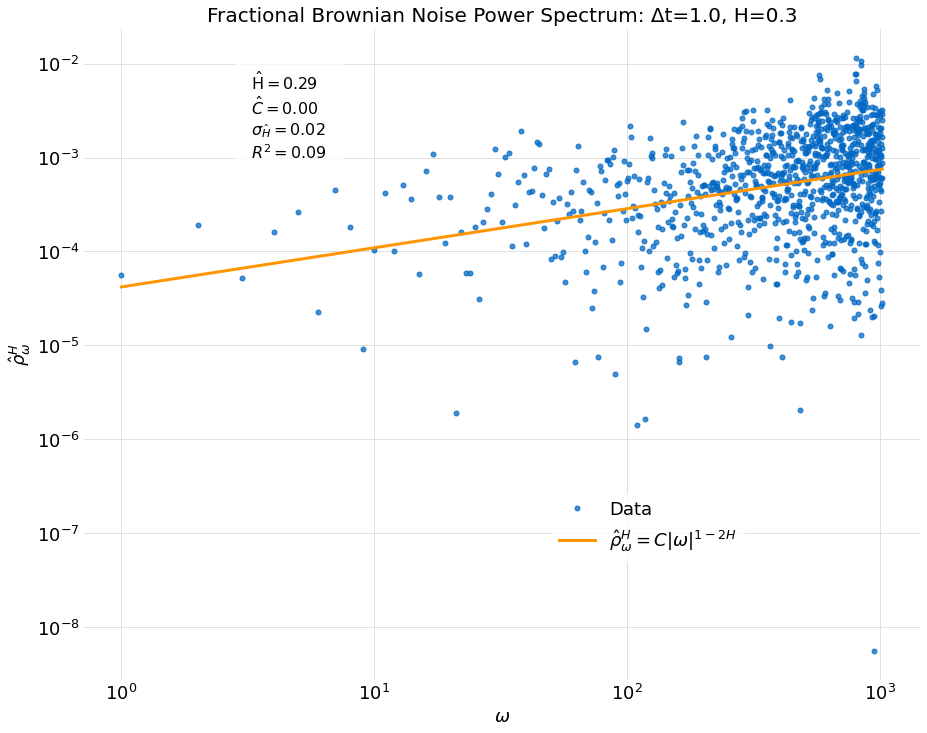

In [19]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.regression(ps, ω, results, title, RegressionPlotType.FBM_PSPEC)